In [2]:
print("Hello, world!")

Hello, world!


In [3]:
import pandas as pd
import os
import glob

path = "./database/PPI"

excel_files = glob.glob(os.path.join(path, "*.xlsx"))       # Retrieve all Excel files in the folder (matching the '.xlsx' pattern)

dataframes = {}                                             # Initialize an empty dictionary to store DataFrames

for file_path in excel_files:
    if os.path.basename(file_path) == "readme.txt":         # Skip the 'readme.txt' file
        continue

    df = pd.read_excel(file_path)                           # Read the Excel file into a DataFrame

    file_name = os.path.basename(file_path)                 # Extract the file name (excluding the path)

    dataframes[file_name] = df                              # Store the DataFrame in the dictionary using the file name as the key

# Now 'dataframes' contains all the DataFrames from Excel files
# You can access them using their respective file names

for file_name, df in dataframes.items():
    print(f"File: {file_name}")
    print(df)                                               # Display the content of each DataFrame
    print("-" * 40)                                         # Separator


d:\anacondas\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anacondas\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anacondas\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anacondas\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anacondas\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook

File: Aircraft engine and engine parts mfg.xlsx
      PPI Industry Data                                         Unnamed: 1  \
0   Original Data Value                                                NaN   
1                   NaN                                                NaN   
2            Series Id:                                    PCU336412336412   
3         Series Title:  PPI industry data for Aircraft engine and engi...   
4             Industry:               Aircraft engine and engine parts mfg   
5              Product:               Aircraft engine and engine parts mfg   
6            Base Date:                                             198512   
7                Years:                                       1985 to 2024   
8                   NaN                                                NaN   
9                  Year                                                Jan   
10                 1985                                                NaN   
11              

### LIST OF FILES

In [4]:
i = 0
for file_name in dataframes.keys():
    print(f"""{i} : {file_name}""")
    i += 1

0 : Aircraft engine and engine parts mfg.xlsx
1 : Aluminum sheet, plate, and foil mfg.xlsx
2 : Automobile, light truck and utility vehicle mfg.xlsx
3 : Ball and roller bearing mfg.xlsx
4 : Capacitor, resistor, coil, transformer, and other inductor mfg.xlsx
5 : carbon_black.xlsx
6 : chemical.xlsx
7 : Construction machinery mfg.xlsx
8 : Current-carrying wiring device mfg.xlsx
9 : Drugs and druggists' sundries merchant wholesalers.xlsx
10 : Electric power and specialty transformer mfg.xlsx
11 : electric_power_distribution.xlsx
12 : fruit_and_vegetable_canning.xlsx
13 : General freight trucking, long-distance, truckload.xlsx
14 : General medical and surgical hospitals.xlsx
15 : Grocery and related product merchant wholesalers.xlsx
16 : Hardware mfg.xlsx
17 : Industrial valve mfg.xlsx
18 : industrial_gas_manufacturing.xlsx
19 : industry_data.xlsx
20 : Iron and steel mills and ferroalloy mfg.xlsx
21 : Line-haul railroads.xlsx
22 : New car dealers.xlsx
23 : Offices of physicians, except menta

In [5]:
def get_dataframe(name):
    df = dataframes[name].iloc[9:,:]
    line = df

    months_list = []

    for i in line:
        months_list.append(line[i].values[0])

    df.columns = months_list
    df = df[1:]
    df = df.set_index("Year")
    return df

In [6]:
df_engine       =   get_dataframe("Aircraft engine and engine parts mfg.xlsx")
df_al           =   get_dataframe("Aluminum sheet, plate, and foil mfg.xlsx")
df_auto         =   get_dataframe("Automobile, light truck and utility vehicle mfg.xlsx")
df_electronics  =   get_dataframe("Capacitor, resistor, coil, transformer, and other inductor mfg.xlsx")

In [11]:
# Assuming your dataframes have the same columns
combined_df = pd.concat([df_engine['Jan'], df_al['Jan'], df_auto['Jan'], df_electronics['Jan']], axis=1)

# Optionally, rename the columns to distinguish them
combined_df.columns = ['Engine', 'Aluminum', 'Auto', 'Electronics']

combined_df.reset_index(inplace=True)

combined_df.sort_values(by="Year", inplace=True)

combined_df.set_index("Year", inplace=True)

combined_df["PPI (avg)"] = combined_df.mean(axis=1) 

combined_df["PPI (avg) [shifted]"] = combined_df.mean(axis=1).shift()

combined_df["Inflation"] = combined_df["PPI (avg) [shifted]"] - combined_df["PPI (avg)"] 

combined_df

,Engine,Aluminum,Auto,Electronics,PPI (avg),PPI (avg) [shifted]
Year,,,,,,
1975,NaN,NaN,NaN,NaN,NaN,None
1976,NaN,57.5,63,NaN,60.25,NaN
1977,NaN,66,66.8,NaN,66.4,60.25
1978,NaN,73.6,71.4,NaN,72.5,66.4
1979,NaN,82.8,76.7,NaN,79.75,72.5
1980,NaN,87,83.5,NaN,85.25,79.75
1981,NaN,96.1,91.4,NaN,93.75,85.25
1982,NaN,103.2,100.5,NaN,101.85,93.75
1983,NaN,99.8,102.2,NaN,101.0,101.85


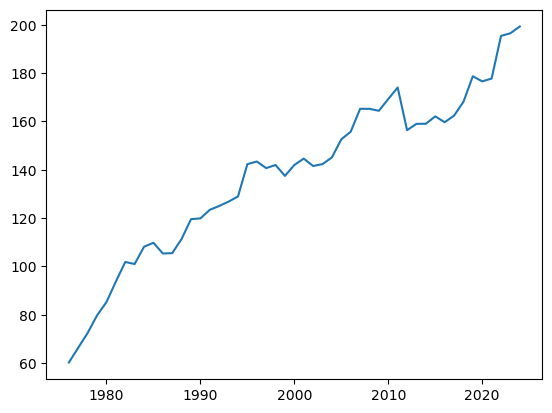

In [8]:
import matplotlib.pyplot as plt

plt.plot(combined_df["PPI (avg)"])
plt.show()

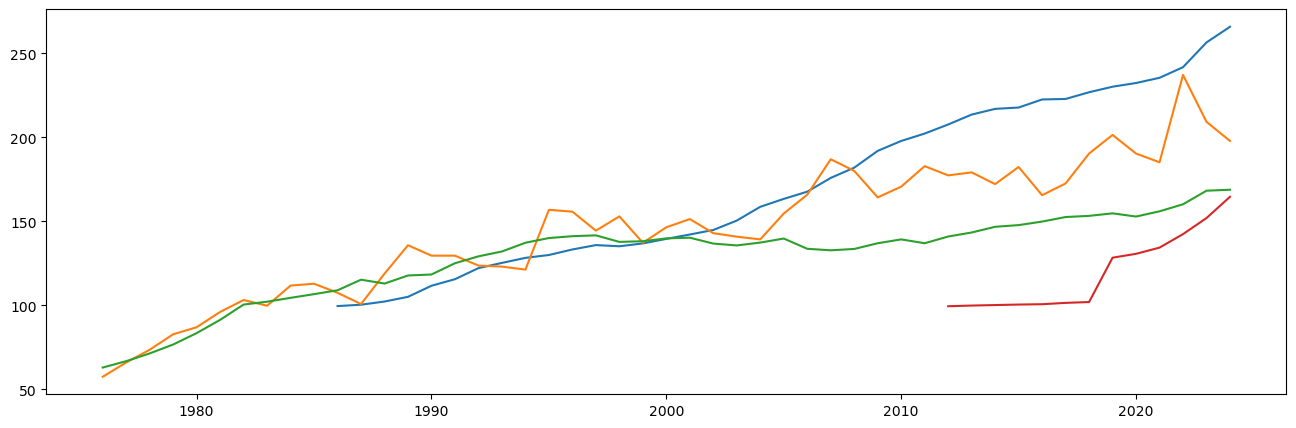

In [9]:

fig , ax = plt.subplots(figsize=(16,5))

ax.plot(df_engine['Jan'], label="Aircraft engine and engine parts")
ax.plot(df_al['Jan'], label="Aluminum sheet, plate, and foil")
ax.plot(df_auto['Jan'], label="Automobile, light truck and utility vehicle")
ax.plot(df_electronics['Jan'], label="Capacitor, resistor, coil, transformer, and other inductor")

plt.show()